In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile do PI

In [2]:
gdf = gpd.read_file('Shapes/PI/22SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5362 entries, 0 to 5361
Data columns (total 14 columns):
ID            5362 non-null int64
CD_GEOCODI    5362 non-null object
TIPO          5362 non-null object
CD_GEOCODB    1608 non-null object
NM_BAIRRO     1608 non-null object
CD_GEOCODS    5362 non-null object
NM_SUBDIST    969 non-null object
CD_GEOCODD    5362 non-null object
NM_DISTRIT    5362 non-null object
CD_GEOCODM    5362 non-null object
NM_MUNICIP    5362 non-null object
NM_MICRO      5362 non-null object
NM_MESO       5362 non-null object
geometry      5362 non-null object
dtypes: int64(1), object(13)
memory usage: 586.5+ KB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para PI

In [5]:
dados = pd.read_csv('Planilhas/PI/CSV/Basico_PI.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(5251, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,220005305000001,140.0,477.0,"3,41","1,67","561,92","203012,63","591,5","196152,54","350,67","346421,11","539,38","431401,45"
1,220005305000002,149.0,570.0,"3,83","2,92","302,87","133619,7","320,05","135716,13","177,43","72461,38","250,21","84007,8"
2,220005305000003,142.0,506.0,"3,56","1,94","317,3","234126,01","333,75","240824,55","194,89","121207,14","287,5","152287,39"
3,220005305000004,89.0,339.0,"3,81","4,77","306,88","57533,36","384,68","41972,45","181,9","51463,55","338,16","42773,76"
4,220005305000005,154.0,536.0,"3,48","2,15","337,73","88119,46","361,19","85751,23","226,08","75399,87","302,97","77755,14"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [12]:
pi = pd.merge(gdf,dados, on='CD_GEOCODI')

In [13]:
pi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5251 entries, 0 to 5250
Data columns (total 26 columns):
ID            5251 non-null int64
CD_GEOCODI    5251 non-null int64
TIPO          5251 non-null object
CD_GEOCODB    1598 non-null object
NM_BAIRRO     1598 non-null object
CD_GEOCODS    5251 non-null object
NM_SUBDIST    963 non-null object
CD_GEOCODD    5251 non-null object
NM_DISTRIT    5251 non-null object
CD_GEOCODM    5251 non-null object
NM_MUNICIP    5251 non-null object
NM_MICRO      5251 non-null object
NM_MESO       5251 non-null object
geometry      5251 non-null object
V001          5242 non-null float64
V002          5242 non-null float64
V003          5242 non-null object
V004          5242 non-null object
V005          5242 non-null object
V006          5242 non-null object
V007          5240 non-null object
V008          5240 non-null object
V009          5251 non-null object
V010          5251 non-null object
V011          5247 non-null object
V012       

In [14]:
del gdf
del dados

Text(0.5,1,'PIAUI - PI')

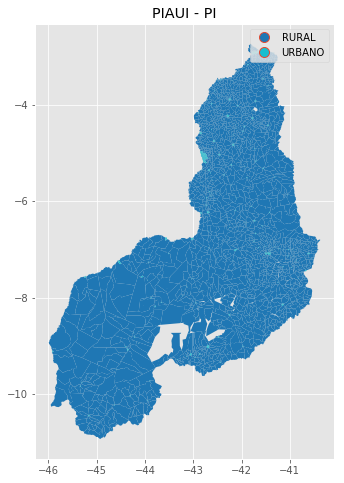

In [15]:
plt.style.use('ggplot')
pi.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('PIAUI - PI')

# Utilizando a projeção de Albers para calcular as áreas

In [16]:
pi['AREA'] = pi.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [40]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [41]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [42]:
areas_urbanas_pi_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='PI']
del areas_urbanas_br_15

In [43]:
areas_urbanas_pi_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
531,Juazeiro do PiauÃ­,PI,0.970,2205516.0,POLYGON ((-41.71038372061392 -5.17730709587732...,0.970419
549,JÃºlio Borges,PI,1.133,2205524.0,POLYGON ((-44.24865257542194 -10.3268314055368...,1.133418
687,Currais,PI,1.111,2203230.0,POLYGON ((-44.41235276257262 -9.01062443219733...,1.111075
716,Pio IX,PI,1.061,2208205.0,POLYGON ((-40.61765388308697 -6.83720733179067...,1.060914
730,SÃ£o JosÃ© do Divino,PI,0.977,2210052.0,POLYGON ((-41.83659915699297 -3.80820357068931...,0.977193


In [44]:
areas_urbanas_pi_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_pi_15['CD_GEOCODM']=areas_urbanas_pi_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_pi_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 224 entries, 531 to 2216
Data columns (total 6 columns):
Municipio     224 non-null object
UF            224 non-null object
Area_Urb      224 non-null float64
CD_GEOCODM    224 non-null int64
geometry      224 non-null object
Area          224 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 12.2+ KB


In [45]:
pi.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no PI')

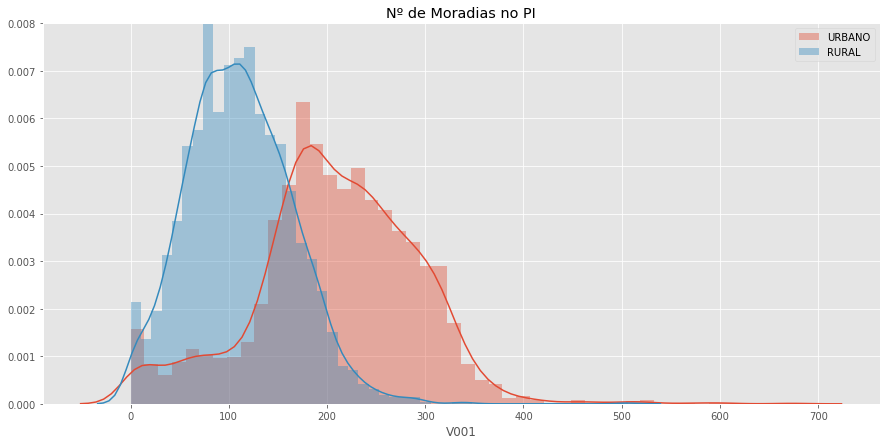

In [46]:
plt.style.use('ggplot')
pi['V001'] = pd.to_numeric(pi['V001'])
pi['V002'] = pd.to_numeric(pi['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(pi[pi['TIPO'] =='URBANO']['V001'])
sns.distplot(pi[pi['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no PI')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [47]:
print('RURAL','\n',pi[pi['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',pi[pi['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    2518.000000
mean      111.220413
std        53.384047
min         0.000000
25%        74.000000
50%       108.000000
75%       146.750000
max       506.000000
Name: V001, dtype: float64
URBANO 
 count    2733.000000
mean      207.907062
std        82.422945
min         0.000000
25%       163.000000
50%       208.000000
75%       263.000000
max       673.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

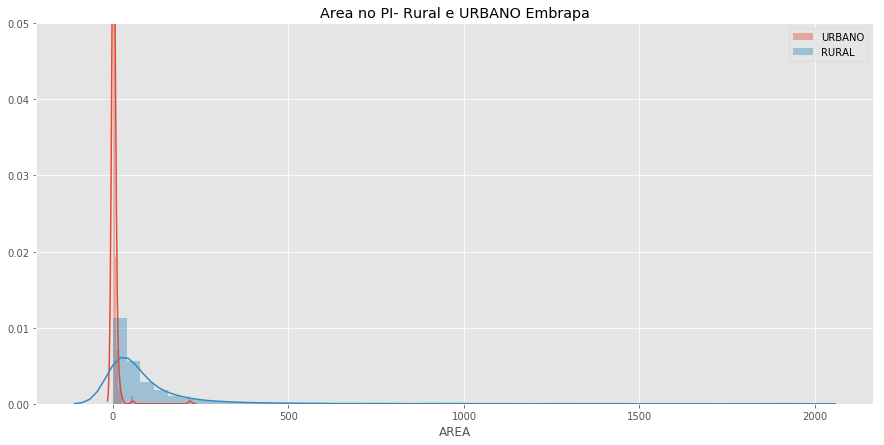

In [48]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_pi_15['Area'])
plt.legend(['URBANO'])
sns.distplot(pi[pi['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no PI- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [49]:
pi['Densidade Moradias'] = pi.V001/pi.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

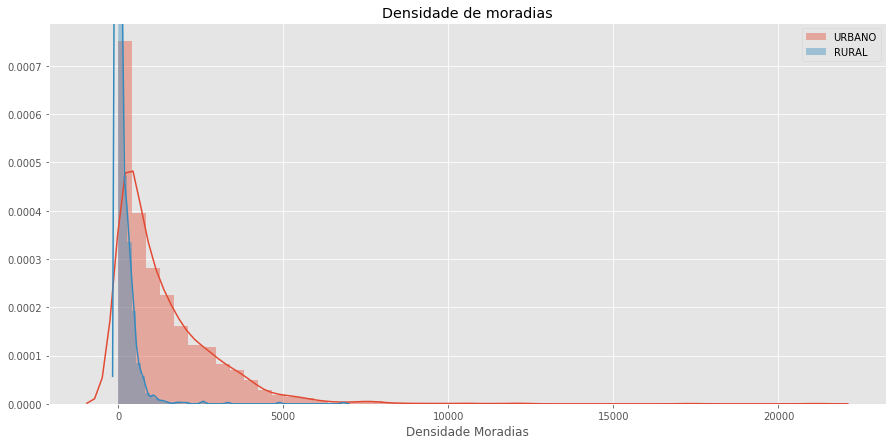

In [50]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(pi[pi['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(pi[pi['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [51]:
print('RURAL','\n',pi[pi['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',pi[pi['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    2518.000000
mean       78.481316
std       263.195004
min         0.000000
25%         0.936752
50%         2.319730
75%         6.999548
max      6825.088487
Name: Densidade Moradias, dtype: float64
URBANO 
 count     2733.000000
mean      1382.630933
std       1532.020900
min          0.000000
25%        305.108662
50%        892.210500
75%       1989.985397
max      21154.597653
Name: Densidade Moradias, dtype: float64


In [52]:
pi[(pi['TIPO']=='RURAL')&(pi['Densidade Moradias']>pi['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,353.000000,3.530000e+02,353.000000,353.000000,353.000000,353.000000
mean,40757.674221,2.206182e+14,95.422096,354.770538,0.264017,492.590335
std,1344.726135,3.442416e+11,44.136671,173.026818,0.170034,537.062949
min,38427.000000,2.200103e+14,6.000000,19.000000,0.006739,193.792168
25%,39548.000000,2.202778e+14,64.000000,242.000000,0.145848,266.647545
50%,40794.000000,2.206209e+14,88.000000,323.000000,0.227826,368.398925
75%,41936.000000,2.209203e+14,118.000000,450.000000,0.348500,511.311267
max,43712.000000,2.211407e+14,268.000000,1049.000000,1.105902,6825.088487


## Descrição da área por setor censitários urbanos e rurais

In [53]:
print('URBANO','\n',areas_urbanas_pi_15['Area'].describe())
print('RURAL','\n',pi[pi['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    224.000000
mean       3.850715
std       15.378851
min        0.093112
25%        0.819127
50%        1.293453
75%        2.731101
max      219.890648
Name: Area, dtype: float64
RURAL 
 count    2518.000000
mean       97.019995
std       175.377082
min         0.006739
25%        14.980522
50%        47.616938
75%       106.037853
max      1947.941345
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

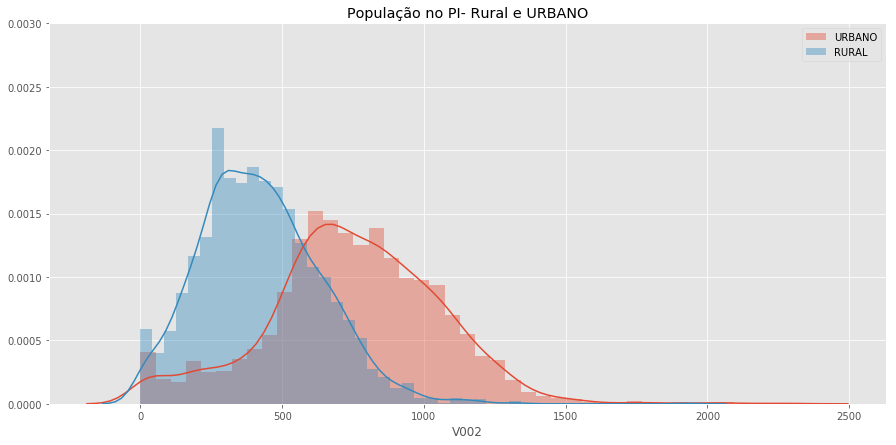

In [54]:
fig = plt.figure(figsize = (15,7))

sns.distplot(pi[pi['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(pi[pi['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no PI- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [55]:
print('RURAL','\n',pi[pi['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',pi[pi['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    2518.000000
mean      423.204130
std       212.314063
min         0.000000
25%       272.000000
50%       408.000000
75%       557.750000
max      1931.000000
Name: V002, dtype: float64
URBANO 
 count    2733.000000
mean      748.345408
std       305.325125
min         0.000000
25%       569.000000
50%       747.000000
75%       952.000000
max      2307.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [56]:
max_area = areas_urbanas_pi_15['Area'].mean() 
min_pop =  pi[pi['TIPO']=='URBANO']['V002'].mean()
min_mor =  pi[pi['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = pi[pi['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [57]:
scrcu = pi[(pi.TIPO=='RURAL')&(pi.V001 >= min_mor)&(pi.AREA <= max_area)&(pi.V002>= min_pop)\
           &(pi['Densidade Moradias']>= min_densidade_moradias)]

In [58]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,2.00000,2.000000e+00,2.000000,2.000000,2.000000,2.000000
mean,42508.50000,2.211001e+14,245.000000,977.500000,0.665821,369.599269
std,17.67767,1.767767e+01,32.526912,58.689863,0.032494,66.890106
min,42496.00000,2.211001e+14,222.000000,936.000000,0.642844,322.300822
25%,42502.25000,2.211001e+14,233.500000,956.750000,0.654332,345.950045
50%,42508.50000,2.211001e+14,245.000000,977.500000,0.665821,369.599269
75%,42514.75000,2.211001e+14,256.500000,998.250000,0.677309,393.248493
max,42521.00000,2.211001e+14,268.000000,1019.000000,0.688797,416.897716


Text(0.5,1,'SCRCU - Por Município')

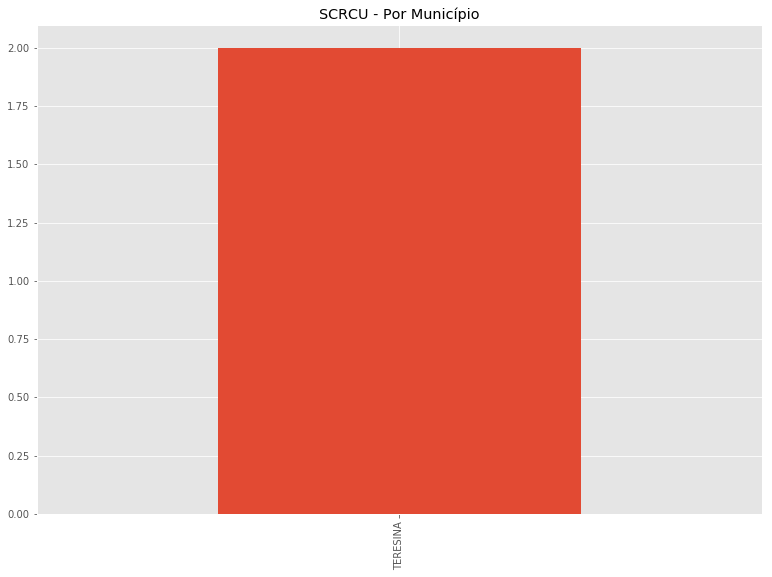

In [59]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado do PI - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


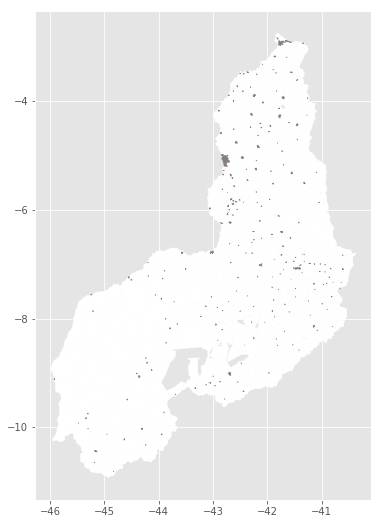

In [60]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
pi.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_pi_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [188]:
areas_urbanas_pi_15.rename(columns={'Area':'AREA'},inplace = True)

In [61]:
fonte = np.zeros(areas_urbanas_pi_15.shape[0])
areas_urbanas_pi_15['FONTE'] = fonte

In [62]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
regioes_urbanas_pi = scrcu[['geometry','FONTE']].append(areas_urbanas_pi_15[['geometry','FONTE']])

In [64]:
regioes_urbanas_pi.head()

,geometry,FONTE
4016,"POLYGON ((-42.7313 -4.99285000000001, -42.7247...",1.0
4041,POLYGON ((-42.8075000053207 -5.276620038320809...,1.0
531,POLYGON ((-41.71038372061392 -5.17730709587732...,0.0
549,POLYGON ((-44.24865257542194 -10.3268314055368...,0.0
687,POLYGON ((-44.41235276257262 -9.01062443219733...,0.0


In [65]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_pi['FONTE'] = regioes_urbanas_pi['FONTE'].apply(fonte) 

In [66]:
regioes_urbanas_pi.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_pi.shp')

In [68]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_pi[regioes_urbanas_pi['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_pi[regioes_urbanas_pi['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_pi.crs)

In [196]:
mplleaflet.show(fig=f,crs=regioes_urbanas_rj.crs)